In [1]:
import networkx as ntx

# AVL stablo

In [2]:
class BSTree:
    class Node:
        def __init__(self, val, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right
            
        def rotate_right(self):
            n = self.left
            self.val, n.val = n.val, self.val
            self.left, n.left, self.right, n.right = n.left, n.right, n, self.right
        
        def rotate_left(self):
            n = self.right
            self.val, n.val = n.val, self.val
            #print(self.left,n.left)
            self.right, n.right, self.left, n.left = n.right, n.left, n, self.left
         
        @staticmethod
        def height(n):
            if not n:
                return -1
            else:
                return max(1+BSTree.Node.height(n.left), 1+BSTree.Node.height(n.right))
            
    def __init__(self):
        self.size = 0
        self.root = None
    
    def __contains__(self, val):
        def contains_rec(node):
            if not node:
                return False
            elif val < node.val:
                return contains_rec(node.left)
            elif val > node.val:
                return contains_rec(node.right)
            else:
                return True
        return contains_rec(self.root)
    
    def __len__(self):
        return self.size
        
    def pprint(self, width=64):
        """ (Lijepi) ispis stabla."""
        height = self.height()
        print(height)
        nodes  = [(self.root, 0)]
        prev_level = 0
        repr_str = ''
        while nodes:
            n,level = nodes.pop(0)
            if prev_level != level:
                prev_level = level
                repr_str += '\n'
            if not n:
                if level < height:
                    nodes.extend([(None, level+1), (None, level+1)])
                repr_str += '{val:^{width}}'.format(val='-', width=width//2**level)
            elif n:
                if n.left or level < height:
                    nodes.append((n.left, level+1))
                if n.right or level < height:
                    nodes.append((n.right, level+1))
                repr_str += '{val:^{width}}'.format(val=n.val, width=width//2**level)
        print(repr_str)
    
    def height(self):
        """Visina čvora."""
        def height_rec(t):
            if not t:
                return -1
            else:
                return max(1+height_rec(t.left), 1+height_rec(t.right))
        return height_rec(self.root)
    
    """
    Statička metoda za balansiranje
    """
    @staticmethod
    def rebalance(t):

        """
        Slučajevi 1 ili 3
        Visina lijevog podstabla je veća od visine desnog podstabla 
        """

        if BSTree.Node.height(t.left) > BSTree.Node.height(t.right):

            """
            Slučaj - lijevo-lijevo otežanost ili lijevo-desno otežanost
            """

            if BSTree.Node.height(t.left.left) >= BSTree.Node.height(t.left.right):
                # left-left
                #print('left-left imbalance detected ',  t.val)
                t.rotate_right()

            else:
                # left-right
                #print('left-right imbalance detected ', t.val)
                t.left.rotate_left()
                t.rotate_right()
  
            """
            ZADATAK 1
            Dopuniti potrebni kôd za ovaj slučaj

        Slučajevi 2 ili 4
        Visina desnog podstabla je veća od visine lijevog podstabla 
            """ 
        else:

            """
            Slučaj - desno-desno otežanost ili desno-lijevo otežanost
            """
                   
            if BSTree.Node.height(t.right.right) >= BSTree.Node.height(t.right.left):
                # right-right
                #print('right-right imbalance detected ',  t.val)
                t.rotate_left()
            else:
                # right-left
                #print('right-left imbalance detected ', t.val)
                t.right.rotate_right()
                t.rotate_left()
        
    # Metoda za umetanje u AVL stablo i balansiranje  
    def add(self, val):
        assert(val not in self)
        def add_rec(node):
            if not node:
                return BSTree.Node(val)
            elif val < node.val:
                node.left = add_rec(node.left)
            else:
                node.right = add_rec(node.right)
            """
            Uvjet za balansiranje
            """
            if abs(BSTree.Node.height(node.left) - BSTree.Node.height(node.right)) >= 2:
                BSTree.rebalance(node)
            return node
        self.root = add_rec(self.root)
        self.size += 1
        
        
        """
             ZADATAK 2 - napisati rekurzivne metode u klasi BSTree za obilazak stabla

             Obilasci stabla:
                - inorder   (left-root-right)
                - preorder  (root-left-right)
                - postorder (left-right-root)
        """
        
    def inorder(self, node):
        if node == None:
            return
        self.inorder(node.left)
        print(node.val)
        self.inorder(node.right)
            
    def postorder(self, node):
        if node == None:
            return
        self.postorder(node.left)
        self.postorder(node.right)
        print(node.val)
           
    def preorder(self, node):
        if node == None:
            return
        print(node.val)
        self.preorder(node.left)
        self.preorder(node.right)

"""
Globalne funkcije izvan razreda za ispis minimalne i maksimalne vrijednosti u stablu
"""        
def minValue(node):
    if node.left == None:
        return node.val
    return minValue(node.left)

def maxValue(node):
    if node.right == None:
        return node.val
    return maxValue(node.right)


"""
Globalne funkcije izvan razreda za ispis listova u stablu s lijeva na desno i s desna na lijevo
"""     

def ispisListova_L_R(root):
    
    if root == None:
        return
    
    queue = []

    queue.append(root)

    while len(queue) > 0:

        print(queue[0].val)
        
        node = queue.pop(0)

        if node.left != None:
            queue.append(node.left)

        if node.right != None:
            queue.append(node.right)

               
def ispisListova_R_L(root):
    
    if root == None:
        return
    
    queue = []

    queue.append(root)

    while len(queue) > 0:

        print(queue[0].val)
        
        node = queue.pop(0)

        if node.right != None:
            queue.append(node.right)

        if node.left != None:
            queue.append(node.left)

In [3]:
# Kreiranje AVL balansiranog stabla iz liste, iscrtavanje stabla i ispis visine
t = BSTree()
# dodavanje u stablo iz liste
for x in [15, 30, 17, 33, 25, 16, 46, 34, 5, 38, 50, 47, 39]:
    t.add(x)

# crtanje stabla
t.pprint()

# ispis visine stabla
print("Visina stabla je: ", t.height(), "\n")

3
                               34                               
               17                              46               
       15              30              38              50       
   5       16      25      33      -       39      47      -    
Visina stabla je:  3 



# Hash

In [4]:
kljucevi = [46, 98, 5, 84, 33, 89, 16, 47, 97, 18, 78, 32, 41, 6, 79, 77, 26, 86, 3, 39, 99, 87, 92]

def h(k: int) -> int:
    return k % 7

velicina_tablice = 7

tablica = {x: [] for x in range(velicina_tablice)}

for k in kljucevi:
    index = h(k)
    tablica[index].append(k)

for pretinac in tablica:
    print(f'Pretinac {pretinac}: {tablica[pretinac]}')

print("\n86 - 3 provjere")
print("39 - 4 provjere")
print("3 - 1 provjera")
print("87 - 2 provjere")

Pretinac 0: [98, 84, 77]
Pretinac 1: [78, 99, 92]
Pretinac 2: [16, 79, 86]
Pretinac 3: [3, 87]
Pretinac 4: [46, 18, 32, 39]
Pretinac 5: [5, 33, 89, 47, 26]
Pretinac 6: [97, 41, 6]

86 - 3 provjere
39 - 4 provjere
3 - 1 provjera
87 - 2 provjere


In [5]:
podaci = ['LW293', 'AF721', 'AO434', 'NE073', 'WT433', 'TT315', 'LA599', 'WE969', 'FF595', 'CA346', 'IU407', 'HD179', 'AL439']

def h_crta(k: int) -> int:
    return (13 * k) % 97

def h(k: int, i: int) -> int:
    return (h_crta(k) + i) % 19

def pretvori_tekst_u_broj(tekst: str) -> int:
    zbroj = sum([ord(slovo) for slovo in tekst])
    return zbroj

velicina_tablice = 19
tablica = {x: 0 for x in range(velicina_tablice)}

for p in podaci:

    k = pretvori_tekst_u_broj(p)

    for i in range(velicina_tablice):
        index = h(k, i)

        if tablica[index] == 0:
            tablica[index] = p
            break

for t in tablica:
    print(f'Pretinac {t}: {tablica[t]}')

print(f"\n'FF595' se nalazi u pretincu 5")
print(f"'WE969' se nalazi u pretincu 4")
print(f"'AL439' se nalazi u pretincu 1")
print(f"'CA346' se nalazi u pretincu 17")
print(f"'IU407' se nalazi u pretincu 18")

Pretinac 0: HD179
Pretinac 1: AL439
Pretinac 2: LW293
Pretinac 3: TT315
Pretinac 4: WE969
Pretinac 5: FF595
Pretinac 6: 0
Pretinac 7: AO434
Pretinac 8: LA599
Pretinac 9: 0
Pretinac 10: 0
Pretinac 11: 0
Pretinac 12: 0
Pretinac 13: 0
Pretinac 14: AF721
Pretinac 15: NE073
Pretinac 16: WT433
Pretinac 17: CA346
Pretinac 18: IU407

'FF595' se nalazi u pretincu 5
'WE969' se nalazi u pretincu 4
'AL439' se nalazi u pretincu 1
'CA346' se nalazi u pretincu 17
'IU407' se nalazi u pretincu 18


# BTree

In [6]:
#demonstrates 234 tree

class DataItem:

	def __init__(self, dd):	#special method to create objects
	#with instances customized to a specific initial state
		self.dData = dd#one piece of data

	def displayItem(self):	#format " /27"
		print ('/', self.dData)
#end class DataItem

class Node:
	#as private instance variables don't exist in Python,
	#hence using a convention: name prefixed with an underscore, to treat them as non-public part
	_ORDER = 4
	def __init__(self):
		self._numItems = 0
		self._pParent = None
		self._childArray = []	#array of nodes
		self._itemArray = []	#array of data
		for j in range(self._ORDER):	#initialize arrays
			self._childArray.append(None)
		for k in range(self._ORDER - 1):
			self._itemArray.append(None)

			#connect child to this node
	def connectChild(self, childNum, pChild):
		self._childArray[childNum] = pChild
		if pChild:
			pChild._pParent = self

			#disconnect child from this node, return it
	def disconnectChild(self, childNum):
		pTempNode = self._childArray[childNum]
		self._childArray[childNum] = None
		return pTempNode

	def getChild(self, childNum):
		return self._childArray[childNum]

	def getParent(self):
		return self._pParent

	def isLeaf(self):
		return not self._childArray[0]

	def getNumItems(self):
		return self._numItems

	def getItem(self, index):	#get DataItem at index
		return self._itemArray[index]

	def isFull(self):
		return self._numItems==self._ORDER - 1

	def findItem(self, key):	#return index of
		for j in range(self._ORDER-1):	#item (within node)
			if not self._itemArray[j]:	#if found,
				break	#otherwise,
			elif self._itemArray[j].dData == key:	#return -1
				return j
		return -1
	#end findItem

	def insertItem(self, pNewItem):
		#assumes node is not full
		self._numItems += 1#will add new item
		newKey = pNewItem.dData	#key of new item

		for j in reversed(range(self._ORDER-1)):	#start on right,	#examine items
			if self._itemArray[j] == None:	#if item null,
				pass	#go left one cell
			else:	#not null,
				itsKey = self._itemArray[j].dData	#get its key
				if newKey < itsKey:	#if it's bigger
					self._itemArray[j+1] = self._itemArray[j]	#shift it right
				else:
					self._itemArray[j+1] = pNewItem	#insert new item
					return j+1#return index to new item
			#end else (not null)
		#end for 	#shifted all items,
		self._itemArray[0] = pNewItem	#insert new item
		return 0
	#end insertItem()

	def removeItem(self):	#remove largest item
		#assumes node not empty
		pTemp = self._itemArray[self._numItems-1]	#save item
		self._itemArray[self._numItems-1] = None	#disconnect it
		self._numItems -= 1#one less item
		return pTemp#return item

	def displayNode(self):	#format "/24/56/74"
		for j in range(self._numItems):
			self._itemArray[j].displayItem()	#format "/56"
		print ('/')	#final "/"

#end class Node

class Tree234:
	#as private instance variables don't exist in Python,
	#hence using a convention: name prefixed with an underscore, to treat them as non-public part
	def __init__(self):
		self._pRoot = Node()	#root node

	def find(self, key):
		pCurNode = self._pRoot	#start at root
		while True:
			childNumber=pCurNode.findItem(key)
			if childNumber != -1:
				return childNumber	#found it
			elif pCurNode.isLeaf():
				return -1#can't find it
			else:	#search deeper
				pCurNode = self.getNextChild(pCurNode, key)
		#end while

	def insert(self, dValue):	#insert a DataItem
		pCurNode = self._pRoot
		pTempItem = DataItem(dValue)

		while True:
			if pCurNode.isFull():	#if node full,
				self.split(pCurNode)	#split it
				pCurNode = pCurNode.getParent()	#back up
					#search once
				pCurNode = self.getNextChild(pCurNode, dValue)
			#end if(node is full)

			elif pCurNode.isLeaf():	#if node is leaf,
				break	#go insert
			#node is not full, not a leaf; so go to lower level
			else:
				pCurNode = self.getNextChild(pCurNode, dValue)
		#end while
		pCurNode.insertItem(pTempItem)	#insert new item
	#end insert()

	def split(self, pThisNode):	#split the node
		#assumes node is full
		
		pItemC = pThisNode.removeItem()	#remove items from
		pItemB = pThisNode.removeItem()	#this node
		pChild2 = pThisNode.disconnectChild(2)	#remove children
		pChild3 = pThisNode.disconnectChild(3)	#from this node

		pNewRight = Node()	#make new node

		if pThisNode == self._pRoot:	#if this is the root,
			self._pRoot = Node()	#make new root
			pParent = self._pRoot	#root is our parent
			self._pRoot.connectChild(0, pThisNode)	#connect to parent
		else:	#this node not the root
			pParent = pThisNode.getParent()	#get parent

		#deal with parent
		itemIndex = pParent.insertItem(pItemB)	#item B to parent
		n = pParent.getNumItems()	#total items?

		j = n-1#move parent's
		while j > itemIndex:	#connections
			pTemp = pParent.disconnectChild(j)	#one child
			pParent.connectChild(j+1, pTemp)	#to the right
			j -= 1
				#connect newRight to parent
		pParent.connectChild(itemIndex+1, pNewRight)

		#deal with newRight
		pNewRight.insertItem(pItemC)	#item C to newRight
		pNewRight.connectChild(0, pChild2)	#connect to 0 and 1
		pNewRight.connectChild(1, pChild3)	#on newRight
	#end split()

	#gets appropriate child of node during search of value
	def getNextChild(self, pNode, theValue):
		#assumes node is not empty, not full, not a leaf
		numItems = pNode.getNumItems()
		
		for j in range(numItems):	#for each item in node
			if theValue < pNode.getItem(j).dData:	#are we less?
				return pNode.getChild(j)	#return left child
		else:	#end for 	#we're greater, so
			return pNode.getChild(j + 1)	#return right child

	def displayTree(self):
		self.recDisplayTree(self._pRoot, 0, 0)

	def recDisplayTree(self, pThisNode, level, childNumber):
		print ('level=', level, 'child=', childNumber)
		pThisNode.displayNode()	#display this node

		#call ourselves for each child of this node
		numItems = pThisNode.getNumItems()
		for j in range(numItems+1):
			pNextNode = pThisNode.getChild(j)
			if pNextNode:
				self.recDisplayTree(pNextNode, level+1, j)
			else:
				return

In [7]:
pTree = Tree234()
lista = [70, 50, 30, 40, 20, 80, 25, 90, 75, 10]
for l in lista:
	pTree.insert(l)
pTree.displayTree()

level= 0 child= 0
/ 50
/
level= 1 child= 0
/ 30
/
level= 2 child= 0
/ 10
/ 20
/ 25
/
level= 2 child= 1
/ 40
/
level= 1 child= 1
/ 80
/
level= 2 child= 0
/ 70
/ 75
/
level= 2 child= 1
/ 90
/


# Dijsktra

In [8]:
import heapq
import networkx as nx
import contextlib
import matplotlib.pyplot as plt

def draw_weighted_graph(graph: nx.Graph, graph_dict: dict) -> None:

    for i,j in graph.edges():
        graph[i][j]['weight'] = graph_dict[i][j]

    weight_labels = nx.get_edge_attributes(graph,'weight')
    pos = nx.spring_layout(graph)

    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(graph,pos, with_labels = True)
    with contextlib.redirect_stdout(None):
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=weight_labels, font_size=7)

def dijkstra(graph, start):
    # Priority queue to store (cost, vertex) tuples
    priority_queue = [(0, start)]
    # Dictionary to store the shortest path to each vertex
    shortest_paths = {vertex: float('inf') for vertex in graph}
    # Start vertex has a distance of 0 from itself
    shortest_paths[start] = 0
    # Dictionary to store the previous node on the shortest path
    previous_nodes = {vertex: None for vertex in graph}

    while priority_queue:
        # Get the vertex with the smallest distance
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # If the distance of the current vertex is greater than the recorded shortest path, skip it
        if current_distance > shortest_paths[current_vertex]:
            continue

        # Check the neighbors of the current vertex
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # If a shorter path to the neighbor is found
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                previous_nodes[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    # Reconstruct the shortest path for each vertex
    paths = {}
    for vertex in graph:
        path = []
        current = vertex
        while current is not None:
            path.append(current)
            current = previous_nodes[current]
        path.reverse()
        paths[vertex] = path

    return shortest_paths, paths

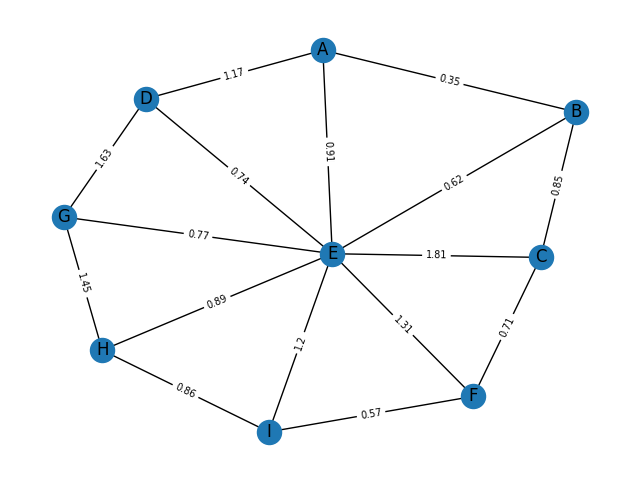

In [9]:
graph = {
    'A': {'B': 0.35, 'D': 1.17, 'E': 0.91},
    'B': {'A': 0.35, 'C': 0.85, 'E': 0.62},
    'C': {'B': 0.85, 'E': 1.81, 'F': 0.71},
    'D': {'A': 1.17, 'E': 0.74, 'G': 1.63},
    'E': {'A': 0.91, 'B': 0.62, 'C': 1.81, 'D': 0.74, 'F': 1.31, 'G': 0.77, 'H': 0.89, 'I': 1.2},
    'F': {'C': 0.71, 'E': 1.31, 'I': 0.57},
    'G': {'D': 1.63, 'E': 0.77, 'H': 1.45},
    'H': {'E': 0.89, 'G': 1.45, 'I': 0.86},
    'I': {'E': 1.2, 'F': 0.57, 'H': 0.86}
}

nx_graph = nx.Graph(graph)
draw_weighted_graph(nx_graph, graph)